# Almost 50% of Velib stations in Paris are now closed

Like many big cities, the city of Paris has been providing a public bicycle sharing system since 2007, called "Vélib". More than 1200 bicycle stations were operational, providing around 20'000 bikes. However after ten years, the Vélib service will be replaced as of January 2018 by a new provider called "Smoovengo". In order to transition to the new service, all stations must be dismantled, and new ones rebuilt. This process has begun in fall 2017, and will be achieved by December 31st. 

However, there is no official reporting on the number of closed Velib stations. To track this, I have been using the [Vélib API](https://developer.jcdecaux.com/#/opendata/vls?page=getstarted) since October. I set up a small Python script that pings the API every 5 minutes, and stores the resulting JSON file on a server. These files give updated information about all Vélib stations, including their status: `OPEN` or `CLOSED`.

I have now collected 13'734 JSON files since October 5th, taking almost 6 Gb. This resource will allow me to do a deeper analysis on the Vélib service, but I wanted to do a quick update on the evolution of open stations, as we are now half-way through the dismantling process.

## Libraries and setup

In [1]:
# Load libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

# Plots parameters
%matplotlib inline

## Load JSON files

In [10]:
### List all extracted JSON files in the folder
json_files = [file for file in os.listdir('./json/') if file.endswith('.json')]
json_files[0:10]

['velib-data_2017-10-05-1840.json',
 'velib-data_2017-10-05-1845.json',
 'velib-data_2017-10-05-1900.json',
 'velib-data_2017-10-05-1905.json',
 'velib-data_2017-10-05-1910.json',
 'velib-data_2017-10-05-1915.json',
 'velib-data_2017-10-05-1935.json',
 'velib-data_2017-10-05-1940.json',
 'velib-data_2017-10-05-1945.json',
 'velib-data_2017-10-05-2000.json']

In [ ]:
### Keep only files generated at 23:55 every day, to get 1 file per day
daily_files = [file for file in json_files if file.endswith('-2355.json')]

In [ ]:
### Load JSON files into a Dataframe
stations = DataFrame(columns=['id', 'status', 'bike_stands', 'date'])
for file in daily_files:
    temp = pd.read_json('/Users/Maison/Desktop/Charles/json/'  + file)
    temp = DataFrame({'id': temp['number'], 'status': temp['status'], 'bike_stands': temp['bike_stands'], 
                      'date': pd.to_datetime(file[-20:-10], format='%Y-%m-%d')})
    stations = stations.append(temp[temp['status'] == 'OPEN'])
    
stations = stations.sort_values(by=['date', 'id']).reset_index(drop=True)

In [19]:
### Glimpse at the dataframe
stations.head()

,bike_stands,date,id,status
0,20,2017-10-06,901,OPEN
1,20,2017-10-06,903,OPEN
2,30,2017-10-06,904,OPEN
3,20,2017-10-06,905,OPEN
4,20,2017-10-06,906,OPEN


## Plot evolution of open stations

In [15]:
### Get number of open stations per day, and sum of bike stands
graph = stations.groupby('date')[['id']].agg('count')
graph.index.name = ''

In [18]:
### Glimpse at the resulting dataframe
graph.head()

,id
,
2017-10-06,1116
2017-10-07,1091
2017-10-08,1066
2017-10-09,1025
2017-10-10,1005


Text(17530,600,'All stations must be closed on 31st Dec. 2017')

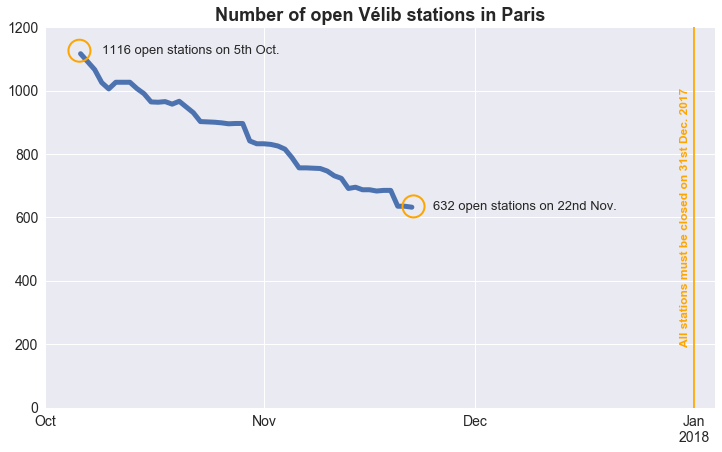

In [26]:
### Plot 

# Plot layout
sns.set(font='sans-serif')
sns.set_palette('deep')
fig = plt.figure(figsize = (12, 7))
ax = fig.add_subplot(1, 1, 1)

# Main plot
graph.plot(x=graph.index, y='id', ax=ax, 
           style='-', lw=5, fontsize=14, legend=False,
           yticks=range(0, 1300, 200), xlim=(17440, 17535))

# Plot title
ax.set_title('Number of open Vélib stations in Paris', fontsize=18, fontweight='bold')

# Annotate first datapoint
ax.text(17444.6, 1116, ' ', bbox=dict(boxstyle="circle, pad=0.5", color='orange', lw=2, fc='None'))
ax.text(17448, 1116, '1116 open stations on 5th Oct.', fontsize=13)

# Annotate last datapoint
ax.text(17492, 625, ' ', bbox=dict(boxstyle="circle, pad=0.5", color='orange', lw=2, fc='None'))
ax.text(17495, 625, '632 open stations on 22nd Nov.', fontsize=13)

# Add vertical line for 1st Jan. deadline
ax.axvline(x=17532, ymin=0, ymax=1, color='orange')
ax.text(17530, 600, 'All stations must be closed on 31st Dec. 2017', 
        rotation=90, va='center', color='orange', fontweight='bold')